In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy
import pandas as pn
from datetime import datetime
import gsw

In [ ]:
#Shipdata
seawolf = pn.read_csv("~/Desktop/NYB Indicators/cold_pool/combined.CTD.datasheets-2018-2020.csv")

In [ ]:
# parse multiple date formats

def try_parsing_date(text):
    for fmt in ('00%y-%m-%d', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [ ]:
year = np.empty(622)
month = np.empty(622)
for i in range(622):
    year[i] = try_parsing_date(str(seawolf['Date'][i])).year
    month[i] = try_parsing_date(str(seawolf['Date'][i])).month

In [ ]:
seawolf['year'] = year
seawolf['month'] = month

In [ ]:
seawolf = seawolf.rename(columns={'CTD.Depth..m.':'Depth','Temp...C.':'Temp'})
seawolf['Temp'][seawolf['Temp']=='?']=np.nan
seawolf['Temp'] = seawolf['Temp'].astype(float)
seawolf['Depth'] = seawolf['Depth'].astype(float)

In [ ]:
seawolf = seawolf.rename(columns={'Lat.Start':'lat','Long.Start':'lon'})

In [ ]:
seawolf

In [ ]:
#no salinity in this seawolf data - can do a mixed layer based on T (want to do pt but it needs salinity in the conversion...)
# loop through the years, find the unique casts in that year
for i in np.unique(seawolf.Cast):
    temp = seawolf.Temp[seawolf.Cast == i]
    depth = seawolf.Depth[seawolf.Cast==i]
    if any(temp) == 1

In [ ]:
seawolf[3:9].pressure.values


In [2]:
from holteandtalley import HolteAndTalley

#h = HolteAndTalley(pressures,temperatures)
 ##The temperature algorithms mixed layer depth
#h.tempMLD

In [ ]:
h = HolteAndTalley(seawolf[5:9].pressure.values,seawolf[5:9].Temp.values)

In [ ]:
seawolf[5:9].Temp.values

In [7]:
data = pn.DataFrame(data=np.empty([9,9]),columns = ['depth','temp','salt','lat','lon','year','month','day','profile#'])

In [6]:
import os

In [8]:
#Opening the CTD data 2018-2021 WOD
k=1
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data2['profile#']=k
        k=k+1
        data = data.append(data2)
        array.close()

In [9]:
data

,depth,temp,salt,lat,lon,year,month,day,profile#
0,1.727234e-77,1.727234e-77,8.893182e-322,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,6.951565e-310,6.951565e-310,0.0,0.0,0.0
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
52,5.258790e+01,6.940000e+00,3.330700e+01,39.845001,-7.283500e+01,2.018000e+03,5.0,26.0,493.0
53,5.358000e+01,6.940000e+00,3.330700e+01,39.845001,-7.283500e+01,2.018000e+03,5.0,26.0,493.0
54,5.457208e+01,6.930000e+00,3.330700e+01,39.845001,-7.283500e+01,2.018000e+03,5.0,26.0,493.0
55,5.556417e+01,6.940000e+00,3.330700e+01,39.845001,-7.283500e+01,2.018000e+03,5.0,26.0,493.0


In [6]:
test_profile = data[8:50]


In [7]:
data[data['profile#']==1]


,depth,temp,salt,lat,lon,year,month,day,profile#
0,0.992336,12.53,32.693001,40.0,-72.176666,2018.0,5.0,26.0,1.0
1,1.984667,12.53,32.693001,40.0,-72.176666,2018.0,5.0,26.0,1.0
2,2.976993,12.53,32.694000,40.0,-72.176666,2018.0,5.0,26.0,1.0
3,3.969314,12.52,32.695000,40.0,-72.176666,2018.0,5.0,26.0,1.0
4,4.961631,12.51,32.696999,40.0,-72.176666,2018.0,5.0,26.0,1.0
...,...,...,...,...,...,...,...,...,...
74,74.411827,7.64,33.620998,40.0,-72.176666,2018.0,5.0,26.0,1.0
75,75.403801,7.64,33.620998,40.0,-72.176666,2018.0,5.0,26.0,1.0
76,76.395782,7.64,33.619999,40.0,-72.176666,2018.0,5.0,26.0,1.0
77,77.387741,7.64,33.619999,40.0,-72.176666,2018.0,5.0,26.0,1.0


In [8]:
test_profile['pressure'] = gsw.p_from_z(-1*test_profile['depth'].values,test_profile['lat'].values)


<ipython-input-8-b635dab94144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_profile['pressure'] = gsw.p_from_z(-1*test_profile['depth'].values,test_profile['lat'].values)


In [9]:
test_profile['SA'] = gsw.SA_from_SP(test_profile.salt.values,test_profile.pressure.values, test_profile.lon.values, test_profile.lat.values)

<ipython-input-9-6eccd28d2a48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_profile['SA'] = gsw.SA_from_SP(test_profile.salt.values,test_profile.pressure.values, test_profile.lon.values, test_profile.lat.values)


In [10]:
test_profile['CT'] = gsw.CT_from_t(test_profile.SA.values,test_profile.temp.values,test_profile.pressure.values)

<ipython-input-10-f60d317be9c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_profile['CT'] = gsw.CT_from_t(test_profile.SA.values,test_profile.temp.values,test_profile.pressure.values)


In [11]:
test_mld = HolteAndTalley(test_profile.pressure.values,test_profile.CT.values)


In [12]:
test_mld.tempMLD


10.497946033760718

In [13]:
test_profile


,depth,temp,salt,lat,lon,year,month,day,profile#,pressure,SA,CT
8,0.000000,0.00,0.000000,0.0,2.121996e-314,2.121996e-314,2.0,2.0,2.371515e-322,0.000000,0.000000,0.015284
0,0.992336,12.53,32.693001,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,0.999999,32.847918,12.569145
1,1.984667,12.53,32.693001,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,1.999997,32.847918,12.569014
2,2.976993,12.53,32.694000,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,2.999996,32.848921,12.568862
3,3.969314,12.52,32.695000,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,3.999994,32.849925,12.558682
4,4.961631,12.51,32.696999,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,4.999993,32.851932,12.548479
5,5.953942,12.50,32.702000,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,5.999991,32.856956,12.538211
6,6.946249,12.41,32.712002,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,6.999990,32.867005,12.447605
7,7.938551,12.21,32.737000,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,7.999989,32.892120,12.246375
8,8.930849,11.95,32.766998,40.0,-7.217667e+01,2.018000e+03,5.0,26.0,1.000000e+00,8.999988,32.922261,11.984896


In [186]:
data['pressure'] = gsw.p_from_z(-1*data['depth'].values,data['lat'].values)


In [187]:
data['SA'] = gsw.SA_from_SP(data.salt.values,data.pressure.values, data.lon.values, data.lat.values)



In [188]:
data['CT'] = gsw.CT_from_t(data.SA.values, data.temp.values, data.pressure.values)


/Users/nyelab/miniconda3/lib/python3.8/site-packages/gsw/_wrapped_ufuncs.py:696: RuntimeWarning: invalid value encountered in ct_from_t
  return _gsw_ufuncs.ct_from_t(SA, t, p)


In [189]:
data['sigma'] = gsw.sigma0(data.SA.values, data.CT.values)


In [190]:
data


,depth,temp,salt,lat,lon,year,month,day,profile#,pressure,SA,CT,sigma
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,52.587902,6.94,33.306999,39.845001,-72.834999,2018.0,5.0,26.0,493.0,52.999929,33.465048,6.951143,26.096098
53,53.579998,6.94,33.306999,39.845001,-72.834999,2018.0,5.0,26.0,493.0,53.999929,33.465049,6.951053,26.096111
54,54.572079,6.93,33.306999,39.845001,-72.834999,2018.0,5.0,26.0,493.0,54.999918,33.465050,6.940952,26.097466
55,55.564175,6.94,33.306999,39.845001,-72.834999,2018.0,5.0,26.0,493.0,55.999928,33.465051,6.950872,26.096137


In [ ]:
#data = data.round(2)

In [ ]:
data

In [2]:
mixeddf = pn.DataFrame(columns = ['lat','lon','year','month','day','profile#','mldT','mldS','mldr'])
mixeddf

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [192]:
data['mldT']=np.nan
data['mldS']=np.nan
data['mldr']=np.nan
i=1
profile = data[data['profile#']==i]
mlds = HolteAndTalley(profile.pressure.values,profile.temp.values,profile.salt.values,profile.sigma.values)
data.mldT[data['profile#']==i] = mlds.tempMLD
data.mldS[data['profile#']==i] = mlds.salinityMLD
data.mldr[data['profile#']==i] = mlds.densityMLD
mixeddf=mixeddf.append({'lat':profile['lat'][0],'lon':profile['lon'][0],
                        'year':profile['year'][0],'month':profile['month'][0],
                        'day':profile['day'][0],'profile#':profile['profile#'][0],
                        'mldT':mlds.tempMLD, 'mldS':mlds.salinityMLD, 'mldr':mlds.densityMLD},ignore_index=True)

<ipython-input-192-c24f50611823>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.mldT[data['profile#']==i] = mlds.tempMLD
<ipython-input-192-c24f50611823>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.mldS[data['profile#']==i] = mlds.salinityMLD
<ipython-input-192-c24f50611823>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.mldr[data['profile#']==i] = mlds.densityMLD


In [193]:
mixeddf

,lat,lon,year,month,day,profile#,mldT,mldS,mldr
0,40.0,-72.176666,2018.0,5.0,26.0,1.0,10.499985,10.0,9.999987


In [3]:
for i in range(2,494):
    try:
        profile = data[data['profile#']==i]
        mlds = HolteAndTalley(profile.pressure.values,profile.temp.values,profile.salt.values,profile.sigma.values)
        data.mldT[data['profile#']==i] = mlds.tempMLD
        data.mldS[data['profile#']==i] = mlds.salinityMLD
        data.mldr[data['profile#']==i] = mlds.densityMLD
        mixeddf=mixeddf.append({'lat':profile['lat'][0],'lon':profile['lon'][0],
                        'year':profile['year'][0],'month':profile['month'][0],
                        'day':profile['day'][0],'profile#':profile['profile#'][0],
                        'mldT':mlds.tempMLD, 'mldS':mlds.salinityMLD, 'mldr':mlds.densityMLD},ignore_index=True)
    except:
        pass

In [4]:
mixeddf


,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [195]:
mixeddf['mldr'][mixeddf['mldr']<0]=np.nan

In [196]:
mixeddf[mixeddf['lat']>40.75]=np.nan

In [237]:
ml2018=mixeddf[mixeddf['year']==2018]
#ml2018DJF_1=ml2018[ml2018['month']>=1]
#ml2018DJF = ml2018DJF_1[ml2018DJF_1['month']<=3]
ml2018MAM_1=ml2018[ml2018['month']>=3]
ml2018MAM = ml2018MAM_1[ml2018MAM_1['month']<=5]
ml2018JJA_1=ml2018[ml2018['month']>=6]
ml2018JJA = ml2018JJA_1[ml2018JJA_1['month']<=8]
ml2018SON_1=ml2018[ml2018['month']>=9]
ml2018SON = ml2018SON_1[ml2018SON_1['month']<=11]
ml2018DJF = ml2018[ml2018['month']<=2]
##
ml2019=mixeddf[mixeddf['year']==2019]
#ml2018DJF_1=ml2018[ml2018['month']>=1]
#ml2018DJF = ml2018DJF_1[ml2018DJF_1['month']<=3]
ml2019MAM_1=ml2019[ml2019['month']>=3]
ml2019MAM = ml2019MAM_1[ml2019MAM_1['month']<=5]
ml2019JJA_1=ml2019[ml2019['month']>=6]
ml2019JJA = ml2019JJA_1[ml2019JJA_1['month']<=8]
ml2019SON_1=ml2019[ml2019['month']>=9]
ml2019SON = ml2019SON_1[ml2019SON_1['month']<=11]
ml2019DJF = ml2019[ml2019['month']<=2]
ml2019DJF = ml2019DJF.append(ml2018[ml2018['month']==12])

In [238]:
ml2019DJF

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [218]:
cp_djf = ml2018DJF['mldT']
cplon_djf = ml2018DJF['lon']
cplat_djf = ml2018DJF['lat']

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [219]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon_djf

y = cplat_djf

z = cp_djf

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

#plt.pcolormesh(X, Y, Z,vmax = 20,vmin = 0 )#shading='auto'
plt.contourf(X, Y, Z,levels = np.arange(0,50,2),vmin=0)#shading='auto'
plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()

ValueError: min() arg is an empty sequence

In [224]:
cp_son = ml2019SON['mldT']
cplon_son = ml2019SON['lon']
cplat_son = ml2019SON['lat']

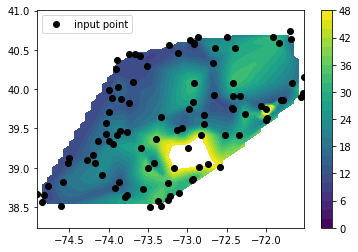

In [225]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon_son

y = cplat_son

z = cp_son

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

#plt.pcolormesh(X, Y, Z,vmax = 20,vmin = 0 )#shading='auto'
plt.contourf(X, Y, Z,levels = np.arange(0,50,2),vmin=0)#shading='auto'
plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()


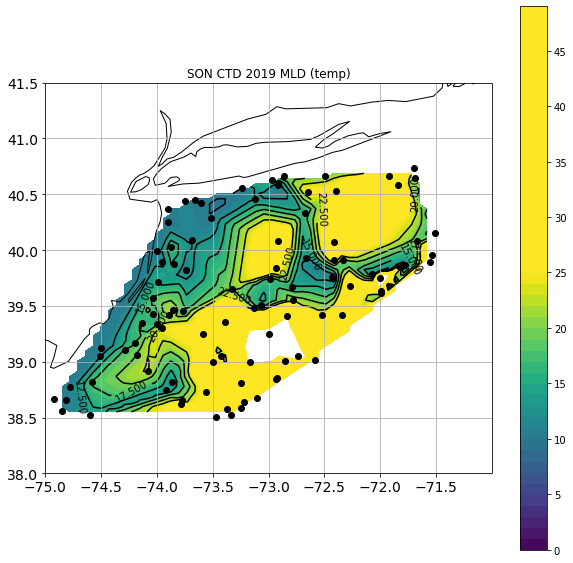

In [226]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C=plt.contourf(X, Y, Z,levels = np.arange(0,50,1),vmin=0,vmax =25)
C2 = ax.contour(X, Y, Z,levels=np.arange(0,25,2.5),colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
plt.plot(x, y, "ok", label="input point")
plt.title('SON CTD 2019 MLD (temp)')
plt.colorbar(C)
plt.clabel(C2)
ax.set_xticks(np.arange(-75,-71,0.5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38,42,0.5), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=14)

In [227]:
cp_mam = ml2019MAM['mldT']
cplon_mam = ml2019MAM['lon']
cplat_mam = ml2019MAM['lat']

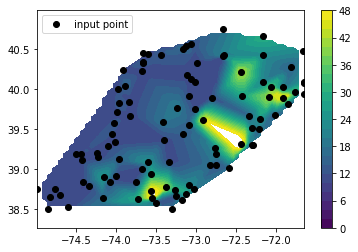

In [228]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon_mam

y = cplat_mam

z = cp_mam

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

#plt.pcolormesh(X, Y, Z,vmax = 20,vmin = 0 )#shading='auto'
plt.contourf(X, Y, Z,levels = np.arange(0,50,2),vmin=0)#shading='auto'
plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()


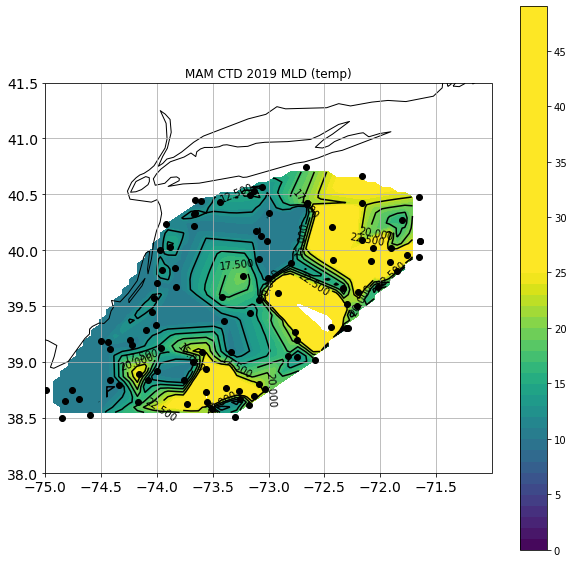

In [229]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C=plt.contourf(X, Y, Z,levels = np.arange(0,50,1),vmin=0,vmax =25)
C2 = ax.contour(X, Y, Z,levels=np.arange(0,25,2.5),colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
plt.plot(x, y, "ok", label="input point")
plt.title('MAM CTD 2019 MLD (temp)')
plt.colorbar(C)
plt.clabel(C2)
ax.set_xticks(np.arange(-75,-71,0.5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38,42,0.5), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=14)

In [230]:
cp = ml2019JJA['mldT']
cplon = ml2019JJA['lon']
cplat = ml2019JJA['lat']

<ipython-input-231-7f686f59ce6e>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z,vmax = 0,vmin = 20 )#shading='auto'


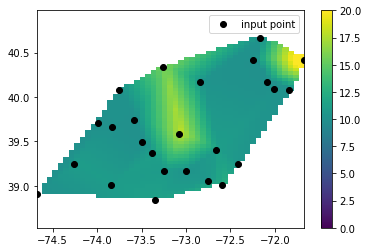

In [231]:
from scipy.interpolate import LinearNDInterpolator
cp, cplat, cplon
x = cplon

y = cplat

z = cp

X = np.linspace(min(x), max(x))

Y = np.linspace(min(y), max(y))

X, Y = np.meshgrid(X, Y)  # 2D grid for interpolation

interp = LinearNDInterpolator(list(zip(x, y)), z)

Z = interp(X, Y)

plt.pcolormesh(X, Y, Z,vmax = 0,vmin = 20 )#shading='auto'

plt.plot(x, y, "ok", label="input point")

plt.legend()

plt.colorbar()

plt.axis("equal")

plt.show()


In [232]:
import cartopy.crs as ccrs
import cartopy

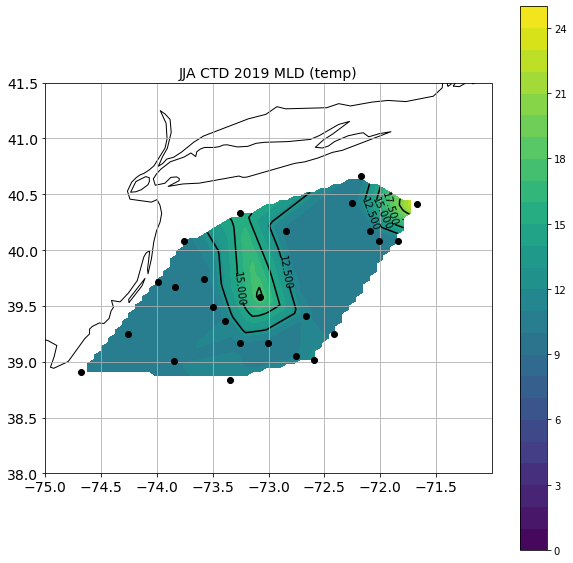

In [233]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [285,289,38.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C=plt.contourf(X, Y, Z,levels = np.arange(0,26,1),vmin=0,vmax = 25)
C2 = ax.contour(X, Y, Z,levels=np.arange(0,25,2.5),colors = 'k',vmax = 80)
#ax.plot(360-X, Y, "ok", label="station")
ax.plot(x, y, "ok", label="input point")
plt.title('JJA CTD 2019 MLD (temp)',fontsize = 14)
plt.colorbar(C)
plt.clabel(C2)
ax.set_xticks(np.arange(-75,-71,0.5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38,42,0.5), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=14)


In [149]:
data = pn.DataFrame(data=np.empty([8,8]),columns = ['depth','temp','salt','lat','lon','year','month','day'])

In [150]:
#Opening the CTD data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.CTD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [151]:
#Opening the GLD data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.GLD/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.GLD/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [152]:
#Opening the PFL data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.PFL/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.PFL/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = array.Salinity
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [153]:
#Opening the XBT data 2018-2021 WOD
for i in os.listdir("/Users/nyelab/Downloads/ocldb1618533792.17769.XBT/"):
    if i.startswith("wo"):
        string = '/Users/nyelab/Downloads/ocldb1618533792.17769.XBT/'+i
        array = xr.open_dataset(string)
        data2 = pn.DataFrame(data = array.Temperature, columns = ['temp'])
        data2['salt'] = np.nan
        depth = array.z.values
        Lon = array.lon.values
        Lat = array.lat.values
        year = pn.to_datetime(array.time.values).year
        month = pn.to_datetime(array.time.values).month
        day = pn.to_datetime(array.time.values).day
        data2['depth'] = depth
        data2['year']=year
        data2['month']=month
        data2['day']=day
        data2['lat']=Lat
        data2['lon']=Lon
        data = data.append(data2)
        array.close()

In [154]:
#Shipdata
seawolf = pn.read_csv("~/Desktop/NYB Indicators/cold_pool/combined.CTD.datasheets-2018-2020.csv")

In [155]:
# parse multiple date formats

def try_parsing_date(text):
    for fmt in ('00%y-%m-%d', '%Y-%m-%d'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

In [156]:
year = np.empty(622)
month = np.empty(622)
for i in range(622):
    year[i] = try_parsing_date(str(seawolf['Date'][i])).year
    month[i] = try_parsing_date(str(seawolf['Date'][i])).month

In [157]:
seawolf['year'] = year
seawolf['month'] = month

In [158]:
seawolf = seawolf.rename(columns={'CTD.Depth..m.':'Depth','Temp...C.':'Temp'})
seawolf['Temp'][seawolf['Temp']=='?']=np.nan
seawolf['Temp'] = seawolf['Temp'].astype(float)
seawolf['Depth'] = seawolf['Depth'].astype(float)

<ipython-input-158-0ae08e00b5ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seawolf['Temp'][seawolf['Temp']=='?']=np.nan


In [159]:
seawolf_fordata = seawolf
seawolf_fordata['day']=''
seawolf_fordata['salt']=''

In [160]:
seawolf_fordata= seawolf_fordata.rename(columns={'Depth':'depth','Temp':'temp','Lat.Start':'lat','Long.Start':'lon'})

In [161]:
seawolf_fordata = seawolf_fordata.drop(columns = 'Station')
seawolf_fordata = seawolf_fordata.drop(columns = ['Unnamed: 0', 'CruiseID', 'Date', 'Bottle.No','Lat.End','Long.End'])

In [162]:
seawolf_fordata = seawolf_fordata.drop(columns='Cast')

In [163]:
data = data.append(seawolf_fordata)

In [177]:
data = data.drop([0,1,2,3,4,5,6,7])

In [178]:
data

,depth,temp,salt,lat,lon,year,month,day
8,8.930849,11.950,32.766998,40.00000,-72.176666,2018.0,5.0,26.0
9,9.923141,11.580,32.803001,40.00000,-72.176666,2018.0,5.0,26.0
10,10.915427,11.180,32.827,40.00000,-72.176666,2018.0,5.0,26.0
11,11.907711,10.760,32.856998,40.00000,-72.176666,2018.0,5.0,26.0
12,12.899989,10.220,32.883999,40.00000,-72.176666,2018.0,5.0,26.0
...,...,...,...,...,...,...,...,...
617,10.000000,6.435,,40.10194,73.195510,2020.0,2.0,
618,2.000000,6.430,,40.10194,73.195510,2020.0,2.0,
619,15.000000,5.510,,40.30732,73.266940,2020.0,2.0,
620,10.000000,5.510,,40.30732,73.266940,2020.0,2.0,


In [179]:
mixeddf = pn.DataFrame(columns = ['lat','lon','year','month','day','profile#','mldT','mldS','mldr'])
mixeddf

,lat,lon,year,month,day,profile#,mldT,mldS,mldr


In [180]:
data['mldT']=np.nan
data['mldS']=np.nan
data['mldr']=np.nan
i=1
profile = data[data['profile#']==i]
mlds = HolteAndTalley(profile.pressure.values,profile.temp.values,profile.salt.values,profile.sigma.values)
data.mldT[data['profile#']==i] = mlds.tempMLD
data.mldS[data['profile#']==i] = mlds.salinityMLD
data.mldr[data['profile#']==i] = mlds.densityMLD
mixeddf=mixeddf.append({'lat':profile['lat'][0],'lon':profile['lon'][0],
                        'year':profile['year'][0],'month':profile['month'][0],
                        'day':profile['day'][0],'profile#':profile['profile#'][0],
                        'mldT':mlds.tempMLD, 'mldS':mlds.salinityMLD, 'mldr':mlds.densityMLD},ignore_index=True)

<ipython-input-180-c24f50611823>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mldT']=np.nan
<ipython-input-180-c24f50611823>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mldS']=np.nan
<ipython-input-180-c24f50611823>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

KeyError: 'profile#'